# Data Source: GeoDist: The CEPII's distances and geographical database
Bilateral distances between the largest cities of those two countries (in terms
of population)

In [30]:
import pandas as pd
import pickle
import numpy as np
import sklearn
from datetime import datetime  
from datetime import timedelta
import geopy.distance
import matplotlib.pyplot as plt

In [31]:
with open('../pkl/COVID_sorted_W_tensors.pkl', 'rb') as f:
    travel_tensor_raw = pickle.load(f) 
    
with open('../pkl/COVID_label_dict.pkl', 'rb') as f:
    label_dict = pickle.load(f) 

In [32]:
pd.date_range('2020-01-19', periods=22, freq='W')

DatetimeIndex(['2020-01-19', '2020-01-26', '2020-02-02', '2020-02-09',
               '2020-02-16', '2020-02-23', '2020-03-01', '2020-03-08',
               '2020-03-15', '2020-03-22', '2020-03-29', '2020-04-05',
               '2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03',
               '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31',
               '2020-06-07', '2020-06-14'],
              dtype='datetime64[ns]', freq='W-SUN')

In [33]:
country_cutline = 54 # 69, 70 give None homogeneity
travel_tensors = travel_tensor_raw[:,0:country_cutline,0:country_cutline]

In [34]:
pd.date_range('2020-01-20', periods=22, freq='W')

DatetimeIndex(['2020-01-26', '2020-02-02', '2020-02-09', '2020-02-16',
               '2020-02-23', '2020-03-01', '2020-03-08', '2020-03-15',
               '2020-03-22', '2020-03-29', '2020-04-05', '2020-04-12',
               '2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10',
               '2020-05-17', '2020-05-24', '2020-05-31', '2020-06-07',
               '2020-06-14', '2020-06-21'],
              dtype='datetime64[ns]', freq='W-SUN')

In [35]:
# travel_tensor_4W = []
# for t in range(21):
#     if(t%4==0):
#         aggr = travel_tensors[t:t+4].sum(axis=0)
#         travel_tensor_4W.append(aggr)
#     if(len(travel_tensor_4W)==4):
#         break

In [36]:
# len(travel_tensor_4W)

4

In [37]:
label_dict

{0: 'Jungnang-gu',
 1: 'Dongjak-gu',
 2: 'Yangcheon-gu',
 3: 'Guro-gu',
 4: 'Gangnam-gu',
 5: 'Jung-gu',
 6: 'Jongno-gu',
 7: 'Eunpyeong-gu',
 8: 'Gangseo-gu',
 9: 'Yeongdeungpo-gu',
 10: 'Dongdaemun-gu',
 11: 'Songpa-gu',
 12: 'Seongdong-gu',
 13: 'Geumcheon-gu',
 14: 'Gwanak-gu',
 15: 'Seocho-gu',
 16: 'Seodaemun-gu',
 17: 'Gangbuk-gu',
 18: 'Yongsan-gu',
 19: 'Nowon-gu',
 20: 'Mapo-gu',
 21: 'Ansan-si',
 22: 'Seongbuk-gu',
 23: 'Goyang-si',
 24: 'Seongnam-si',
 25: 'Gwangjin-gu',
 26: 'Dobong-gu',
 27: 'Namyangju-si',
 28: 'Gangdong-gu',
 29: 'Anyang-si',
 30: 'Guri-si',
 31: 'Suwon-si',
 32: 'Paju-si',
 33: 'Gwangmyeong-si',
 34: 'Gimpo-si',
 35: 'Anseong-si',
 36: 'Gunpo-si',
 37: 'Uijeongbu-si',
 38: 'Gwacheon-si',
 39: 'Icheon-si',
 40: 'Pyeongtaek-si',
 41: 'Hanam-si',
 42: 'Siheung-si',
 43: 'Yangpyeong-gun',
 44: 'Dongducheon-si',
 45: 'Yongin-si',
 46: 'Gwangju-si',
 47: 'Bucheon-si',
 48: 'Yeoncheon-gun',
 49: 'Yeoju-si',
 50: 'Hwaseong-si',
 51: 'Uiwang-si',
 52: 'Pocheon-

In [38]:
pop = pd.read_csv("../COVIDdata/SeoulFloating.csv")
pop.date=pd.to_datetime(pop.date)

In [44]:
week_slices = pd.date_range('2020-01-20', periods=22, freq='W')
week_slices

DatetimeIndex(['2020-01-26', '2020-02-02', '2020-02-09', '2020-02-16',
               '2020-02-23', '2020-03-01', '2020-03-08', '2020-03-15',
               '2020-03-22', '2020-03-29', '2020-04-05', '2020-04-12',
               '2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10',
               '2020-05-17', '2020-05-24', '2020-05-31', '2020-06-07',
               '2020-06-14', '2020-06-21'],
              dtype='datetime64[ns]', freq='W-SUN')

In [45]:
# monday = pd.date_range('2020-01-20', periods=22, freq='7D')
# tueday = pd.date_range('2020-01-21', periods=22, freq='7D')
# wedday = pd.date_range('2020-01-22', periods=22, freq='7D')
thuday = pd.date_range('2020-01-16', periods=22, freq='7D')
# friday = pd.date_range('2020-01-24', periods=22, freq='7D')
# satday = pd.date_range('2020-01-25', periods=22, freq='7D')
sunday = pd.date_range('2020-02-02', periods=18, freq='7D')

In [48]:
week_slices[1:-3]

DatetimeIndex(['2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23',
               '2020-03-01', '2020-03-08', '2020-03-15', '2020-03-22',
               '2020-03-29', '2020-04-05', '2020-04-12', '2020-04-19',
               '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17',
               '2020-05-24', '2020-05-31'],
              dtype='datetime64[ns]', freq='W-SUN')

In [49]:
def node_float_pop(nodename):
    if(nodename=='Dongjak-gu'):
        nodename = 'Dongjag-gu'
    node_pop = pop[pop['city']==nodename]
    node_pop = node_pop[np.invert(node_pop['date'].isin(thuday))]
    fp_list = []
    for d in week_slices[1:-3]:
        condition = (node_pop['date']< d) & (node_pop['date'] >= d - timedelta(days=7))
        filtered_pop = node_pop[condition]
        fpsum = filtered_pop['fp_num'].sum()
        if(fpsum>0):
            fp_list.append(fpsum)
        else:
            fp_list.append(fp_list[-1])
    return np.array(fp_list)

In [50]:
# attract = np.sum(travel_tensors, 1) # attractiveness
# emit = np.sum(travel_tensors, 2) # emmisiveness
# mean_adj = np.mean(travel_tensors,0)

In [51]:
# mean_adj

In [52]:
# avg_attract = np.mean(attract, 0)
# avg_emit = np.mean(emit, 0)

In [53]:
ccode = pd.read_csv('countries_codes_and_coordinates.csv').replace('"','', regex=True).replace(' ','', regex=True)

In [54]:
ccode = pd.read_csv('../COVIDdata/Region.csv')

In [55]:
ccode[ccode['city']=='Gangdong-gu']['latitude']-ccode[ccode['city']=='Gangdong-gu']['longitude']

2   -89.593345
dtype: float64

In [56]:
# label3 = list(label_dict.values())

In [57]:
# float(ccode[ccode['city']=='Seoul']['latitude'])

In [58]:
# label3 = []
# for i in range(len(label2)):
#     for j in range(len(ccode)):
#         if(label2[i]==ccode.iloc[j,1]):
#             if(ccode.iloc[j,2] == ccode.iloc[j-1,2]):
#                 continue
#             label3.append(ccode.iloc[j,2])

In [59]:
from geopy import distance
gravity_df = np.zeros([country_cutline*country_cutline*(21-2),4])
line = 0
nodes_array = [0,2,3,7,8,9,10,11,13,14,15,16,18,19,20,22,25,26,28]
# nodes_array = [0,2,3]

floating_list = []
for i in nodes_array:
    floating_list.append(node_float_pop(label_dict[i]))

In [60]:
def node_patient_traffic(node_num):
    cnt_num = node_num
    intraffic = np.sum(tensors[:,:,cnt_num], 1) #in-traffic
    outtraffic = np.sum(tensors[:,cnt_num,:], 1) #outtraffic
    return intraffic + outtraffic

In [63]:
tensors = np.array(travel_tensors)# travel_tensor_raw[:,:54,:54]
tensors.shape

(21, 54, 54)

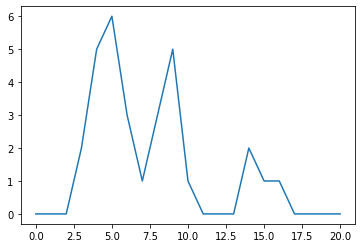

In [64]:
plt.plot(node_patient_traffic(26))

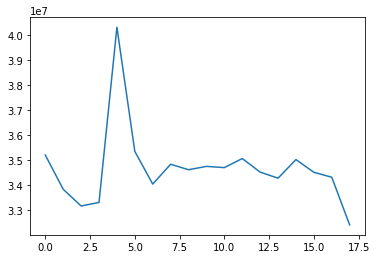

In [65]:
plt.plot(node_float_pop(label_dict[26]))

In [69]:
lag=1

In [70]:
for t in range(18):
    for i in range(len(nodes_array)):
        for j in range(len(nodes_array)):
            print(i,j,t)
            e = floating_list[i][t]
            a = floating_list[j][t]
            source = label_dict[nodes_array[i]]
            target = label_dict[nodes_array[j]]
            y = travel_tensors[t+lag,i,j]
            slat = (ccode[ccode['city']==source].iloc[0,:]['latitude'])
            slong = (ccode[ccode['city']==source].iloc[0,:]['longitude'])
            tlat = (ccode[ccode['city']==target].iloc[0,:]['latitude'])
            tlong = (ccode[ccode['city']==target].iloc[0,:]['longitude'])
            coords_1 = (slat, slong)
            coords_2 = (tlat, tlong)
            d = distance.distance(coords_1, coords_2).km
            if((source==target)
    #            |(len(d)==0)
              ):
                e,a,d,y = -1,-1,-1,0
            gravity_df[line,0] = e
            gravity_df[line,1] = a
    #         print(i,j,d)
            gravity_df[line,2] = d
            gravity_df[line,3] = y
            line += 1

0 0 0
0 1 0
0 2 0
0 3 0
0 4 0
0 5 0
0 6 0
0 7 0
0 8 0
0 9 0
0 10 0
0 11 0
0 12 0
0 13 0
0 14 0
0 15 0
0 16 0
0 17 0
0 18 0
1 0 0
1 1 0
1 2 0
1 3 0
1 4 0
1 5 0
1 6 0
1 7 0
1 8 0
1 9 0
1 10 0
1 11 0
1 12 0
1 13 0
1 14 0
1 15 0
1 16 0
1 17 0
1 18 0
2 0 0
2 1 0
2 2 0
2 3 0
2 4 0
2 5 0
2 6 0
2 7 0
2 8 0
2 9 0
2 10 0
2 11 0
2 12 0
2 13 0
2 14 0
2 15 0
2 16 0
2 17 0
2 18 0
3 0 0
3 1 0
3 2 0
3 3 0
3 4 0
3 5 0
3 6 0
3 7 0
3 8 0
3 9 0
3 10 0
3 11 0
3 12 0
3 13 0
3 14 0
3 15 0
3 16 0
3 17 0
3 18 0
4 0 0
4 1 0
4 2 0
4 3 0
4 4 0
4 5 0
4 6 0
4 7 0
4 8 0
4 9 0
4 10 0
4 11 0
4 12 0
4 13 0
4 14 0
4 15 0
4 16 0
4 17 0
4 18 0
5 0 0
5 1 0
5 2 0
5 3 0
5 4 0
5 5 0
5 6 0
5 7 0
5 8 0
5 9 0
5 10 0
5 11 0
5 12 0
5 13 0
5 14 0
5 15 0
5 16 0
5 17 0
5 18 0
6 0 0
6 1 0
6 2 0
6 3 0
6 4 0
6 5 0
6 6 0
6 7 0
6 8 0
6 9 0
6 10 0
6 11 0
6 12 0
6 13 0
6 14 0
6 15 0
6 16 0
6 17 0
6 18 0
7 0 0
7 1 0
7 2 0
7 3 0
7 4 0
7 5 0
7 6 0
7 7 0
7 8 0
7 9 0
7 10 0
7 11 0
7 12 0
7 13 0
7 14 0
7 15 0
7 16 0
7 17 0
7 18 0
8 0 0
8 1 0
8 2 

5 16 3
5 17 3
5 18 3
6 0 3
6 1 3
6 2 3
6 3 3
6 4 3
6 5 3
6 6 3
6 7 3
6 8 3
6 9 3
6 10 3
6 11 3
6 12 3
6 13 3
6 14 3
6 15 3
6 16 3
6 17 3
6 18 3
7 0 3
7 1 3
7 2 3
7 3 3
7 4 3
7 5 3
7 6 3
7 7 3
7 8 3
7 9 3
7 10 3
7 11 3
7 12 3
7 13 3
7 14 3
7 15 3
7 16 3
7 17 3
7 18 3
8 0 3
8 1 3
8 2 3
8 3 3
8 4 3
8 5 3
8 6 3
8 7 3
8 8 3
8 9 3
8 10 3
8 11 3
8 12 3
8 13 3
8 14 3
8 15 3
8 16 3
8 17 3
8 18 3
9 0 3
9 1 3
9 2 3
9 3 3
9 4 3
9 5 3
9 6 3
9 7 3
9 8 3
9 9 3
9 10 3
9 11 3
9 12 3
9 13 3
9 14 3
9 15 3
9 16 3
9 17 3
9 18 3
10 0 3
10 1 3
10 2 3
10 3 3
10 4 3
10 5 3
10 6 3
10 7 3
10 8 3
10 9 3
10 10 3
10 11 3
10 12 3
10 13 3
10 14 3
10 15 3
10 16 3
10 17 3
10 18 3
11 0 3
11 1 3
11 2 3
11 3 3
11 4 3
11 5 3
11 6 3
11 7 3
11 8 3
11 9 3
11 10 3
11 11 3
11 12 3
11 13 3
11 14 3
11 15 3
11 16 3
11 17 3
11 18 3
12 0 3
12 1 3
12 2 3
12 3 3
12 4 3
12 5 3
12 6 3
12 7 3
12 8 3
12 9 3
12 10 3
12 11 3
12 12 3
12 13 3
12 14 3
12 15 3
12 16 3
12 17 3
12 18 3
13 0 3
13 1 3
13 2 3
13 3 3
13 4 3
13 5 3
13 6 3
13 7 3
13 8 

12 15 6
12 16 6
12 17 6
12 18 6
13 0 6
13 1 6
13 2 6
13 3 6
13 4 6
13 5 6
13 6 6
13 7 6
13 8 6
13 9 6
13 10 6
13 11 6
13 12 6
13 13 6
13 14 6
13 15 6
13 16 6
13 17 6
13 18 6
14 0 6
14 1 6
14 2 6
14 3 6
14 4 6
14 5 6
14 6 6
14 7 6
14 8 6
14 9 6
14 10 6
14 11 6
14 12 6
14 13 6
14 14 6
14 15 6
14 16 6
14 17 6
14 18 6
15 0 6
15 1 6
15 2 6
15 3 6
15 4 6
15 5 6
15 6 6
15 7 6
15 8 6
15 9 6
15 10 6
15 11 6
15 12 6
15 13 6
15 14 6
15 15 6
15 16 6
15 17 6
15 18 6
16 0 6
16 1 6
16 2 6
16 3 6
16 4 6
16 5 6
16 6 6
16 7 6
16 8 6
16 9 6
16 10 6
16 11 6
16 12 6
16 13 6
16 14 6
16 15 6
16 16 6
16 17 6
16 18 6
17 0 6
17 1 6
17 2 6
17 3 6
17 4 6
17 5 6
17 6 6
17 7 6
17 8 6
17 9 6
17 10 6
17 11 6
17 12 6
17 13 6
17 14 6
17 15 6
17 16 6
17 17 6
17 18 6
18 0 6
18 1 6
18 2 6
18 3 6
18 4 6
18 5 6
18 6 6
18 7 6
18 8 6
18 9 6
18 10 6
18 11 6
18 12 6
18 13 6
18 14 6
18 15 6
18 16 6
18 17 6
18 18 6
0 0 7
0 1 7
0 2 7
0 3 7
0 4 7
0 5 7
0 6 7
0 7 7
0 8 7
0 9 7
0 10 7
0 11 7
0 12 7
0 13 7
0 14 7
0 15 7
0 16 7
0 17 7


18 13 9
18 14 9
18 15 9
18 16 9
18 17 9
18 18 9
0 0 10
0 1 10
0 2 10
0 3 10
0 4 10
0 5 10
0 6 10
0 7 10
0 8 10
0 9 10
0 10 10
0 11 10
0 12 10
0 13 10
0 14 10
0 15 10
0 16 10
0 17 10
0 18 10
1 0 10
1 1 10
1 2 10
1 3 10
1 4 10
1 5 10
1 6 10
1 7 10
1 8 10
1 9 10
1 10 10
1 11 10
1 12 10
1 13 10
1 14 10
1 15 10
1 16 10
1 17 10
1 18 10
2 0 10
2 1 10
2 2 10
2 3 10
2 4 10
2 5 10
2 6 10
2 7 10
2 8 10
2 9 10
2 10 10
2 11 10
2 12 10
2 13 10
2 14 10
2 15 10
2 16 10
2 17 10
2 18 10
3 0 10
3 1 10
3 2 10
3 3 10
3 4 10
3 5 10
3 6 10
3 7 10
3 8 10
3 9 10
3 10 10
3 11 10
3 12 10
3 13 10
3 14 10
3 15 10
3 16 10
3 17 10
3 18 10
4 0 10
4 1 10
4 2 10
4 3 10
4 4 10
4 5 10
4 6 10
4 7 10
4 8 10
4 9 10
4 10 10
4 11 10
4 12 10
4 13 10
4 14 10
4 15 10
4 16 10
4 17 10
4 18 10
5 0 10
5 1 10
5 2 10
5 3 10
5 4 10
5 5 10
5 6 10
5 7 10
5 8 10
5 9 10
5 10 10
5 11 10
5 12 10
5 13 10
5 14 10
5 15 10
5 16 10
5 17 10
5 18 10
6 0 10
6 1 10
6 2 10
6 3 10
6 4 10
6 5 10
6 6 10
6 7 10
6 8 10
6 9 10
6 10 10
6 11 10
6 12 10
6 13 1

17 4 12
17 5 12
17 6 12
17 7 12
17 8 12
17 9 12
17 10 12
17 11 12
17 12 12
17 13 12
17 14 12
17 15 12
17 16 12
17 17 12
17 18 12
18 0 12
18 1 12
18 2 12
18 3 12
18 4 12
18 5 12
18 6 12
18 7 12
18 8 12
18 9 12
18 10 12
18 11 12
18 12 12
18 13 12
18 14 12
18 15 12
18 16 12
18 17 12
18 18 12
0 0 13
0 1 13
0 2 13
0 3 13
0 4 13
0 5 13
0 6 13
0 7 13
0 8 13
0 9 13
0 10 13
0 11 13
0 12 13
0 13 13
0 14 13
0 15 13
0 16 13
0 17 13
0 18 13
1 0 13
1 1 13
1 2 13
1 3 13
1 4 13
1 5 13
1 6 13
1 7 13
1 8 13
1 9 13
1 10 13
1 11 13
1 12 13
1 13 13
1 14 13
1 15 13
1 16 13
1 17 13
1 18 13
2 0 13
2 1 13
2 2 13
2 3 13
2 4 13
2 5 13
2 6 13
2 7 13
2 8 13
2 9 13
2 10 13
2 11 13
2 12 13
2 13 13
2 14 13
2 15 13
2 16 13
2 17 13
2 18 13
3 0 13
3 1 13
3 2 13
3 3 13
3 4 13
3 5 13
3 6 13
3 7 13
3 8 13
3 9 13
3 10 13
3 11 13
3 12 13
3 13 13
3 14 13
3 15 13
3 16 13
3 17 13
3 18 13
4 0 13
4 1 13
4 2 13
4 3 13
4 4 13
4 5 13
4 6 13
4 7 13
4 8 13
4 9 13
4 10 13
4 11 13
4 12 13
4 13 13
4 14 13
4 15 13
4 16 13
4 17 13
4 18 13


16 2 15
16 3 15
16 4 15
16 5 15
16 6 15
16 7 15
16 8 15
16 9 15
16 10 15
16 11 15
16 12 15
16 13 15
16 14 15
16 15 15
16 16 15
16 17 15
16 18 15
17 0 15
17 1 15
17 2 15
17 3 15
17 4 15
17 5 15
17 6 15
17 7 15
17 8 15
17 9 15
17 10 15
17 11 15
17 12 15
17 13 15
17 14 15
17 15 15
17 16 15
17 17 15
17 18 15
18 0 15
18 1 15
18 2 15
18 3 15
18 4 15
18 5 15
18 6 15
18 7 15
18 8 15
18 9 15
18 10 15
18 11 15
18 12 15
18 13 15
18 14 15
18 15 15
18 16 15
18 17 15
18 18 15
0 0 16
0 1 16
0 2 16
0 3 16
0 4 16
0 5 16
0 6 16
0 7 16
0 8 16
0 9 16
0 10 16
0 11 16
0 12 16
0 13 16
0 14 16
0 15 16
0 16 16
0 17 16
0 18 16
1 0 16
1 1 16
1 2 16
1 3 16
1 4 16
1 5 16
1 6 16
1 7 16
1 8 16
1 9 16
1 10 16
1 11 16
1 12 16
1 13 16
1 14 16
1 15 16
1 16 16
1 17 16
1 18 16
2 0 16
2 1 16
2 2 16
2 3 16
2 4 16
2 5 16
2 6 16
2 7 16
2 8 16
2 9 16
2 10 16
2 11 16
2 12 16
2 13 16
2 14 16
2 15 16
2 16 16
2 17 16
2 18 16
3 0 16
3 1 16
3 2 16
3 3 16
3 4 16
3 5 16
3 6 16
3 7 16
3 8 16
3 9 16
3 10 16
3 11 16
3 12 16
3 13 16
3 14 

In [104]:
from copy import deepcopy
gravity_df2 =deepcopy(gravity_df)

In [105]:
gravity_df2 = pd.DataFrame(gravity_df2)
gravity_df2.columns = ['emit','attract','distance','T']
gravity_df2 = gravity_df2[gravity_df2['distance'] >0]
# gravity_df2 = gravity_df2[gravity_df2['T'] >0]

In [106]:
gravity_df2.corr()

,emit,attract,distance,T
emit,1.000000,-0.022449,0.053576,0.013893
attract,-0.022449,1.000000,0.053576,0.030891
distance,0.053576,0.053576,1.000000,-0.029185
T,0.013893,0.030891,-0.029185,1.000000


In [107]:
# gravity_df2 = gravity_df2[gravity_df2['emit']<5.0e+7]

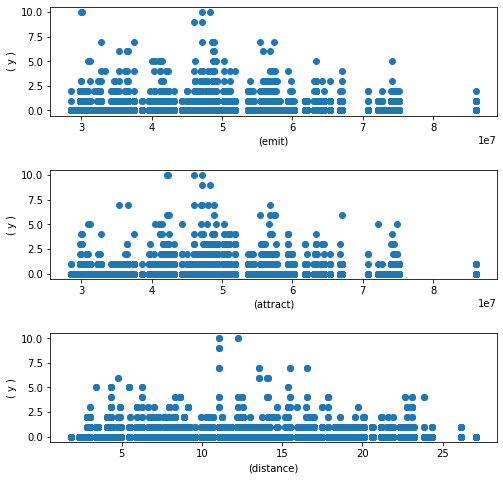

In [108]:
fig = plt.figure(figsize=[8,8])
plt.subplot(3, 1, 1)
plt.scatter(np.power(gravity_df2['emit'],1),(gravity_df2['T']))
plt.xlabel('(emit)'); plt.ylabel('( y )')

plt.subplot(3, 1, 2)
plt.scatter(np.power(gravity_df2['attract'],1),(gravity_df2['T']))
plt.xlabel('(attract)'); plt.ylabel('( y )')

plt.subplot(3, 1, 3)
plt.scatter(np.power(gravity_df2['distance'],1),(gravity_df2['T']))
plt.xlabel('(distance)'); plt.ylabel('( y )')

fig.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [109]:
gravity_df2['emit2'] = np.power(gravity_df2['emit'], 2)
gravity_df2['attract2'] = np.power(gravity_df2['attract'],2)
gravity_df2['distance2'] = np.power(gravity_df2['distance'],2)

In [110]:
# def scale(em):
#     return 10+90*(em-np.min(em))/(np.max(em)-np.min(em))

In [111]:
# gravity_df['emit'] = scale(gravity_df['emit'])
# gravity_df['attract'] = scale(gravity_df['attract'])
# gravity_df['distance'] = scale(gravity_df['distance'])
# gravity_df['T'] = scale(gravity_df['T'])

# Right skewed log(T)

NameError: name 'log_grav_df' is not defined

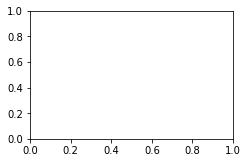

In [112]:
fig = plt.figure(figsize=[8,8])
plt.subplot(3, 2, 1)
plt.scatter(log_grav_df['emit'],(log_grav_df['T']))
plt.xlabel('log(emit)'); plt.ylabel('y')
plt.subplot(3, 2, 2)
plt.scatter(gravity_df2['emit'],(gravity_df2['T']))
plt.xlabel('(emit)'); plt.ylabel('( y )')

plt.subplot(3, 2, 3)
plt.scatter(log_grav_df['attract'],(log_grav_df['T']))
plt.xlabel('log(attract)'); plt.ylabel('y')
plt.subplot(3, 2, 4)
plt.scatter(gravity_df2['attract'],(gravity_df2['T']))
plt.xlabel('log(attract)'); plt.ylabel('log( y )')

plt.subplot(3, 2, 5)
plt.scatter(log_grav_df['distance'],(log_grav_df['T']))
plt.xlabel('log(distance)'); plt.ylabel('y')
plt.subplot(3, 2, 6)
plt.scatter(gravity_df2['distance'],(gravity_df2['T']))
plt.xlabel('log(distance)'); plt.ylabel('log( y )')

fig.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [116]:
import statsmodels.api as sm
# offset = 4
X = gravity_df2[['emit','attract','distance']]
y = gravity_df2['T']

# glm = sm.GLM(y, X, family=sm.families.Gaussian(link=sm.families.links.log))
glm = sm.OLS(y, X)
# glm = sm.GLM(y, X, family=sm.families.InverseGaussian(link=sm.families.links.log))
# glm = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.identity))
# glm = sm.GLM(y, X, family=sm.families.Tweedie(var_power=10))
result = glm.fit()
result.summary()
# gamma_model = smf.glm(formula='y ~ emit + attract + distance', data=log_grav_df, family=sm.families.Gaussian(sm.families.links.identity))
# gamma_results = gamma_model.fit()
# print(gamma_results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      T   R-squared (uncentered):                   0.057
Model:                            OLS   Adj. R-squared (uncentered):              0.056
Method:                 Least Squares   F-statistic:                              245.8
Date:                Sun, 23 Aug 2020   Prob (F-statistic):                   6.11e-155
Time:                        10:15:26   Log-Likelihood:                         -10560.
No. Observations:               12312   AIC:                                  2.113e+04
Df Residuals:                   12309   BIC:                                  2.115e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
emit        1.343e-09   3.44e-10      3.898      0.000    6.68e-10    2.02e-09
attract     2.192e-09   3.44e-10      6.365      0.000    1.52e-09    2.87e-09
distance      -0.0027      0.001     -3.198      0.001      -0.004      -0.001
==============================================================================
Omnibus:                    15755.779   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2920538.592
Skew:                           7.126   Prob(JB):                         0.00
Kurtosis:                      77.094   Cond. No.                     1.14e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

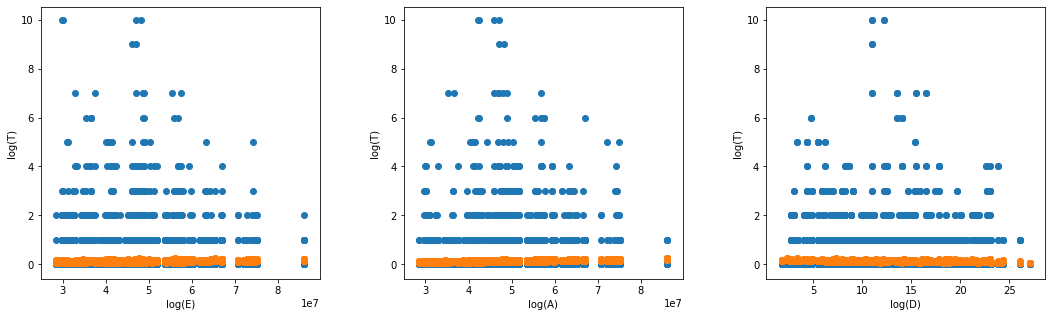

In [117]:
pred = result.predict(gravity_df2[['emit','attract','distance']])

fig = plt.figure(figsize=[18,5])
plt.subplot(1, 3, 1)
X= gravity_df2['emit']
plt.scatter(X,y)
plt.scatter(X,pred)
plt.xlabel("log(E)")
plt.ylabel("log(T)")

plt.subplot(1, 3, 2)
X= gravity_df2['attract']
plt.scatter(X,y)
plt.scatter(X,pred)
plt.xlabel("log(A)")
plt.ylabel("log(T)")

plt.subplot(1, 3, 3)
X= gravity_df2['distance']
plt.scatter(X,y)
plt.scatter(X,pred)
plt.xlabel("log(D)")
plt.ylabel("log(T)")

fig.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [31]:
import statsmodels.api as sm

X = (log_grav_df_processed[['emit','attract','distance']])
y = (log_grav_df_processed['T'])

# Note the difference in argument order
model = sm.OLS((y), X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      T   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              6483.
Date:                Sun, 09 Aug 2020   Prob (F-statistic):                        0.00
Time:                        19:38:26   Log-Likelihood:                         -301.27
No. Observations:                 510   AIC:                                      608.5
Df Residuals:                     507   BIC:                                      621.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
emit           0.3418      0.025     13.456      0.000       0.292       0.392
attract        0.4284      0.026     16.417      0.000       0.377       0.480
distance      -0.0325      0.028     -1.164      0.245      -0.087       0.022
==============================================================================
Omnibus:                       39.783   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.969
Skew:                           0.677   Prob(JB):                     3.83e-11
Kurtosis:                       3.653   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
week_slices = pd.date_range('2016-01-04', periods=200+1, freq='W')
xaxis = week_slices[0::4]

In [33]:
cnt1=24
cnt2=0
time = -18
RU_emit = np.sum(travel_tensors[time,:], 1)[cnt1]
US_emit = np.sum(travel_tensors[time,:], 1)[cnt2]
RU_attract = np.sum(travel_tensors[time,:], 0)[cnt1]
US_attract = np.sum(travel_tensors[time,:], 0)[cnt2]
d = dis_df[(dis_df['iso_o']==label3[cnt2])&(dis_df['iso_d']==label3[cnt1])]['dist']
d = np.float(d)

NameError: name 'dis_df' is not defined

In [ ]:
# pred_RU_to_US = result.predict(np.log([RU_emit, US_attract, d]))
# pred_US_to_RU = result.predict(np.log(np.array([US_emit, RU_attract, d])+1e-30))
pred_US_to_RU_list = []
pred_RU_to_US_list = []
for t in range(24):
    RU_emit = np.sum(travel_tensors[-24+t,:], 1)[cnt1]
    US_emit = np.sum(travel_tensors[-24+t,:], 1)[cnt2]
    RU_attract = np.sum(travel_tensors[-24+t,:], 0)[cnt1]
    US_attract = np.sum(travel_tensors[-24+t,:], 0)[cnt2]
    d = dis_df[(dis_df['iso_o']==label3[cnt2])&(dis_df['iso_d']==label3[cnt1])]['dist']
    d = np.float(d)
    pred_US_to_RU = result.predict(np.log(np.array([US_emit, RU_attract, d])+1e-30))
    pred_US_to_RU_list.append(pred_US_to_RU)
    pred_RU_to_US = result.predict(np.log(np.array([RU_emit, US_attract, d])+1e-30))
    pred_RU_to_US_list.append(pred_RU_to_US)

In [ ]:
print(xaxis[-19])
print(xaxis[-18])

In [ ]:
# y = travel_tensors[-24:,cnt2,cnt1] - np.exp(pred_US_to_RU_list).T
# y = y[0]
fig = plt.figure(figsize=[12,7])
plt.subplot(2, 1, 1)
plt.plot(xaxis[-24:],travel_tensors[-24:,cnt2,cnt1], color='red', label='History')
plt.plot(xaxis[-24:],np.exp(pred_US_to_RU_list), color='green', label='Estimation by Gravity Model')
plt.axvline(xaxis[time], linestyle='--', label='Russia Worldcup')
plt.title('Traffic from USA to Russia')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(xaxis[-24:],travel_tensors[-24:,cnt1,cnt2], color='red', label='History')
plt.plot(xaxis[-24:],np.exp(pred_RU_to_US_list), color='green', label='Estimation by Gravity Model')
plt.axvline(xaxis[time], linestyle='--', label='Russia Worldcup')
plt.title('Traffic from Russia to USA')
plt.legend()

fig.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [ ]:
# cnt1=24
# cnt2=0
# time = -18
RU_emit = np.sum(travel_tensors[time,:], 1)[cnt1]
US_emit = np.sum(travel_tensors[time,:], 1)[cnt2]
RU_attract = np.sum(travel_tensors[time,:], 0)[cnt1]
US_attract = np.sum(travel_tensors[time,:], 0)[cnt2]
d = dis_df[(dis_df['iso_o']==label3[cnt2])&(dis_df['iso_d']==label3[cnt1])]['dist']
d = np.float(d)

In [ ]:
logT_RUtoUS = np.log(travel_tensors[time,cnt1,cnt2])
logT_UStoRU = np.log(travel_tensors[time,cnt2,cnt1])

In [ ]:
pred = result.predict(log_grav_df_processed[['emit','attract','distance']])
pred_RU_to_US = result.predict(np.log([RU_emit, US_attract, d]))
pred_US_to_RU = result.predict(np.log([US_emit, RU_attract, d]))

fig = plt.figure(figsize=[18,5])
plt.subplot(1, 3, 1)
X= log_grav_df_processed['emit']
plt.scatter(X,log_grav_df_processed['T'], alpha=0.1)
plt.scatter(X,pred, alpha=0.1)
plt.scatter(np.log(US_emit), logT_UStoRU, color='red', label = 'History')
plt.scatter(np.log(US_emit), pred_US_to_RU, label = 'Estimation')
plt.xlabel("log(E)")
plt.ylabel("log(T)")
plt.legend()

plt.subplot(1, 3, 2)
X= log_grav_df_processed['attract']
plt.scatter(X,log_grav_df_processed['T'], alpha=0.1)
plt.scatter(X,pred, alpha=0.1)
plt.scatter(np.log(RU_attract), logT_UStoRU, color='red', label = 'History')
plt.scatter(np.log(RU_attract), pred_US_to_RU, label = 'Estimation')
plt.xlabel("log(A)")
plt.ylabel("log(T)")
plt.legend()

plt.subplot(1, 3, 3)
X= log_grav_df_processed['distance']
plt.scatter(X,log_grav_df_processed['T'], alpha=0.1)
plt.scatter(X,pred, alpha=0.1)
plt.scatter(np.log(d), logT_UStoRU, color='red', label = 'History')
plt.scatter(np.log(d), pred_US_to_RU, label = 'Estimation')

plt.xlabel("log(D)")
plt.ylabel("log(T)")
plt.legend()

fig.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [ ]:
plt.hist(log_grav_df_processed['T'], bins=30)

In [ ]:
# 100 0.770
# 80, 0.738
# 70, 0.727
# cutline = 60, R2 = 0.701
# cutline = 50, R2 = 0.66
# cutline = 40, R2 = 0.62


In [ ]:
# Mean >= 1 filter
# 100, 0.656
# 70, 0.660